In [4]:
import numpy as np
import scipy.stats as sp 
import scipy.stats as stats
import matplotlib.pyplot as mp
from matplotlib.ticker import PercentFormatter
import shapely.geometry as sgeom


import xarray as xr
import datetime as dt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader

from pprint import pprint

<hr>
Set up datasets
<hr>

In [5]:
run_info =  {}


################
#### LENS 1 ####
################


run_info['run_set'] = 'lens1'

# Dir if on CGD/thorodin
#run_info['run_root'] = '/project/mojave/cesm1/LENS/atm/' # LENS root directory
#run_info['run_freq'] = 'month_1' #Frequency to analyze


# Dir if on casper/cheyenne
#run_info['run_root'] = '/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/atm/proc/tseries/' # LENS root directory
#run_info['run_freq'] = 'monthly' #Frequency to analyze



## PD ##
#run_info['run_pref'] = 'b.e11.B20TRC5CNBDRD.f09_g16' ; rtype='historical'
#run_info['run_suff'] = '192001-200512' # File suffix
#run_info['run_yrs'] =  (1948,2005) #First/last years to grab



## RCP85 ##
#run_info['run_pref'] = 'b.e11.BRCP85C5CNBDRD.f09_g16' ; rtype = 'rcp85'
#run_info['run_suff'] = '208101-210012' # File suffix
#run_info['run_yrs'] =  (2081,2100) # First/last years to grab


################
#### CMIP6  ####
################

run_info['run_set'] = 'cmip6'
run_info['run_root'] = '/glade/collections/cdg/data/CMIP6/' # LENS root directory
run_info['run_freq'] = 'monthly' 


## PD ##
#lens_range = False
#run_info['run_pref'] = '' ; rtype='historical'
#run_info['run_yrs'] =  (1948,2005) # First/last years to grab
#run_info['run_suff'] = '185001-201412'
#run_info['run_ens'] = (1,2,3,4,5,6,7,8,10,11) # First and last ensemble member


## RCP85/SSP85 ##
lens_range = False
run_info['run_pref'] = '' ; rtype='ssp585'
run_info['run_yrs'] =  (2081,2100) # First/last years to grab
run_info['run_suff'] = '185001-201412'
run_info['run_ens'] = (4,10,11) # Only subset availabele for some reason.



run_info['plot_obs'] = True # Obs if future mostly.
run_info['obs_yrs'] = (1948,2005)
run_info['run_var'] = 'pr' ; vscale = 86400.


run_info['run_period'] =  ('June','July','August','September') # Monthly to consider


# Regions
run_info['run_reg'] = np.array([31,37,246,257]) ; pname = 'AZ+NM' # Lat/on  ranges for AZ+NM
#run_info['run_reg'] = np.array([31,37,246,251]) ; pname='Arizona' # Lat/on  ranges for AZ
#run_info['run_reg'] = np.array([31,37,251,257]) ; pname='New Mexico' # Lat/on  ranges for NM

#run_info['run_reg'] = np.array([-15,15,120,160]) # Lat/on  ranges for averaging

<hr>
Loop Cases
<hr>

hi
** ens num,name =  0 4


/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


hi
** ens num,name =  1 10


/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


hi
** ens num,name =  2 11


/ncar/usr/jupyterhub/envs/cmip6-201910/lib/python3.7/site-packages/xarray/conventions.py:500: SerializationWarning: variable 'pr' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  decode_timedelta=decode_timedelta,


<xarray.DataArray 'precip' (time: 696, lat: 24, lon: 44)>
[734976 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 31.12 31.38 31.62 31.88 ... 36.12 36.38 36.62 36.88
  * lon      (lon) float32 246.1 246.4 246.6 246.9 ... 256.1 256.4 256.6 256.9
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2005-12-01
Attributes:
    long_name:     Monthly Average of Daily Accumulated Precipitation
    units:         mm/day
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Unified Gauge-Based Analysis of Daily Precipitation ov...
    level_desc:    Surface
    statistic:     Monthly Mean
    parent_stat:   Observation
    valid_range:   [  0. 350.]
    actual_range:  [ 0.       63.015995]
-- Region ->  -114.0 31 -103.0 37



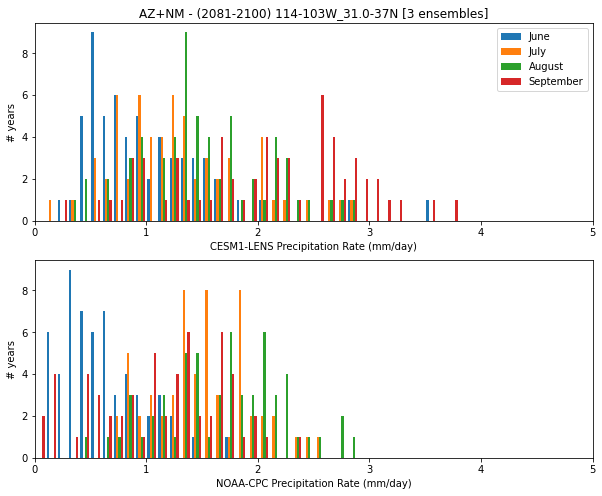

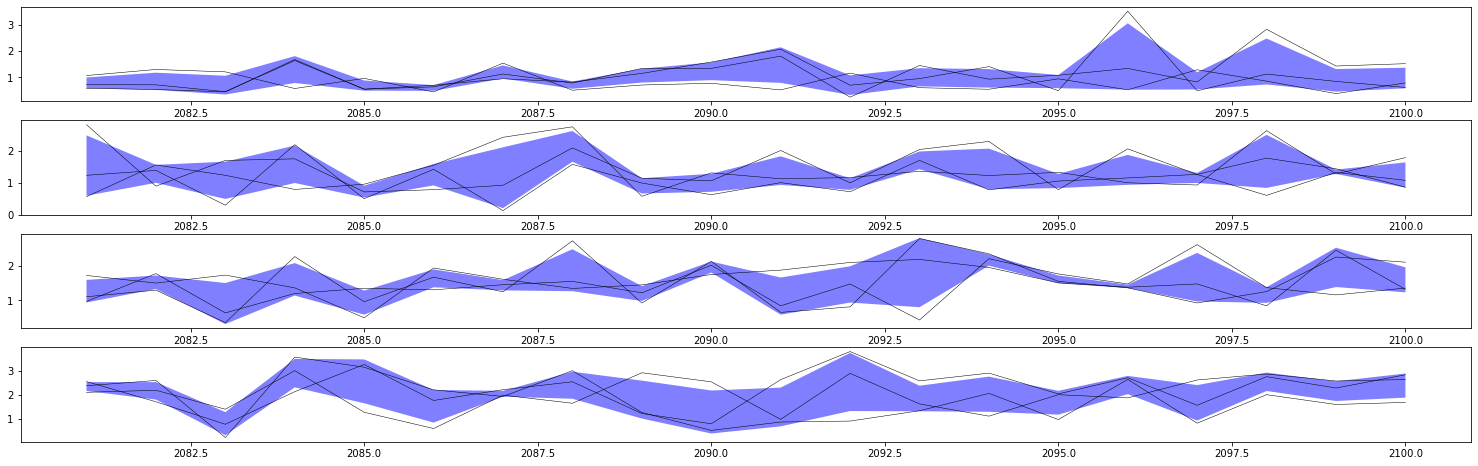

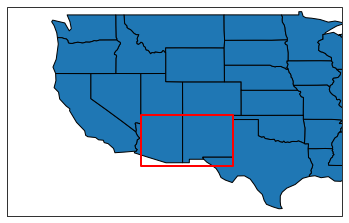

In [6]:



##################################

run_root   = run_info['run_root']
run_set    = run_info['run_set'] 
run_freq   = run_info['run_freq']
run_obs    = run_info['plot_obs']
obs_yrs    = run_info['obs_yrs']
run_pref   = run_info['run_pref']
run_var    = run_info['run_var']
run_ens    = run_info['run_ens']
run_suff   = run_info['run_suff']
run_yrs    = run_info['run_yrs']
run_period = run_info['run_period']
run_reg    = run_info['run_reg']

# OBS #
obs_root = '/glade/work/rneale/data/NOAA_CPC_USA/'

#nens = run_ens[1]-run_ens[0]+1
nmonths = len(run_period)


# Regions in string
reg_a_out = '%d-%dW_%.1f-%dN' % (360-run_reg[2],360-run_reg[3],run_reg[0],run_reg[1])


# Ensemble number/name array #
if lens_range: 
    run_nums = np.arange(run_ens[0],run_ens[1]+1,1) # Wierdly needs run_ens+1
else:
    run_nums = np.array(run_ens)

nens = len(run_nums)

var_tav_ens = False
nyrs = run_yrs[1]-run_yrs[0]+1 # Number of years


var_tav_ts = np.zeros((nmonths,len(run_nums),nyrs))

#if run_set=='lens1':
    

#var_tav_ens = None
fig, ax = mp.subplots(2,figsize=(10, 8))



### ### ### ### ### 
###  Loop Cases ###
### ### ### ### ### 

for ir,rname in enumerate(run_nums):
   
    if run_set=='lens1':
        rname = '{:03}'.format(rname) # Format for ens# in LENS
        run_file = run_root+run_freq+'/'+run_var+'/'+run_pref+'.'+str(rname)+'.cam.h0.'+run_var+'.'+run_suff+'.nc'
    

    if run_set=='cmip6':
        rname = '{:01}'.format(rname) # Format for ens# in LENS
        if rtype=='historical':
            run_file0 = run_root+'CMIP/NCAR/CESM2/historical/'
#        run_file = run_file0+'r'+rname+'i1p1f1/Amon/'+run_var+'/gn/latest/'+run_var+'_Amon_CESM2_historical_r'+rname+'i1p1f1_gn_'+run_suff+'.nc'
            run_file = run_file0+'r'+rname+'i1p1f1/Amon/'+run_var+'/gn/latest/'+run_var+'_Amon_CESM2_historical_r'+rname+'i1p1f1_gn_*.nc'
        if rtype=='ssp585':
            print('hi')
            run_file0 = run_root+'ScenarioMIP/NCAR/CESM2/ssp585/'
            run_file = run_file0+'r'+rname+'i1p1f1/Amon/'+run_var+'/gn/latest/'+run_var+'_Amon_CESM2_ssp585_r'+rname+'i1p1f1_gn_*.nc'
        
        

    print('** ens num,name = ', ir,rname)
    
# Regional/temporal data selection

    if run_var=='PRECT':
        run_file_c = run_root+run_freq+'/PRECC/'+run_pref+'.'+str(rname)+'.cam.h0.PRECC.'+run_suff+'.nc'
        run_obj_c = xr.open_dataset(run_file_c,engine='netcdf4')
    
        run_file_l = run_root+run_freq+'/PRECL/'+run_pref+'.'+str(rname)+'.cam.h0.PRECL.'+run_suff+'.nc'
        run_obj_l = xr.open_dataset(run_file_l,engine='netcdf4')
        
        var_c = run_obj_c['PRECC'].loc[str(run_yrs[0]):str(run_yrs[1]),run_reg[0]:run_reg[1],run_reg[2]:run_reg[3]] 
        var_l = run_obj_l['PRECL'].loc[str(run_yrs[0]):str(run_yrs[1]),run_reg[0]:run_reg[1],run_reg[2]:run_reg[3]] 
        var   = var_c+var_l
        
    else :
#        run_obj = xr.open_dataset(run_file,engine='netcdf4')
        run_obj = xr.open_mfdataset(run_file,engine='netcdf4')
        var = run_obj[run_var].loc[str(run_yrs[0]):str(run_yrs[1]),run_reg[0]:run_reg[1],run_reg[2]:run_reg[3]] 
        
    var = var*vscale
    
# Latitude (weighted) and longitude averaging
    gw_lat = np.cos(np.deg2rad(var.lat.values))  # Latitude weights
    var_av = (var * gw_lat[None, :, None]).sum(dim='lat') / np.sum(gw_lat)
    var_av = var_av.mean('lon')

# Time average (month or season)
    if ir==0:
        time = var.time # Read time
        months = time.dt.month # Array of months number
        mon_name = time.dt.strftime('%B') # Array of month names
        ptime = time.dt.year+(time.time.dt.month-1)/12 # Fraction of year (jan=0). x-axis on tseries plots\    
        pyear = time.dt.year # Just grab year array for tseries plots
      

########################       
# Tricky: extract tuple of arrays for points for
########################  

    if ir>0 : var_tav_prev = var_tav_tup # Set to previous value so we can append new run to this.
    var_tav_tup = () # Reset for this run
    
    for im in range(len(run_period)):
        im4ave = np.where(mon_name==run_period[im]) # Indices for this month
        var_tav = var_av[im4ave] # Values each year for this month
         
        var_tav_ts[im,ir,:] = var_tav 
#        ax_ts[im].plot(np.unique(pyear),var_tav) # Plot against just single years, for each month
        
        if ir==0 :
            var_tav_now = var_tav
        else :
            var_tav_now = np.concatenate((var_tav_prev[im],var_tav),axis=0)
                       
        var_tav_tup = var_tav_tup+(var_tav_now,) # Add to tuple for plotting
     
    
########################
##  MODEL HISTOGRAMS  ##
########################


num_bins = 50
bin_range = (0,5)

ax[0].hist(var_tav_tup, num_bins, histtype='bar', label = run_period, density=False, range=bin_range)    
#ax[0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[0].set_xlabel('CESM1-LENS Precipitation Rate (mm/day)')   
ax[0].set_ylabel('# years')  
ax[0].set_xlim([0.,5.]) 
ax[0].set_title(pname+' - ('+str(run_yrs[0])+'-'+str(run_yrs[1])+') '+reg_a_out+' ['+str(nens)+' ensembles]')
#ax[0].set_ylim([0.,1.8])  

ax[0].legend()



#fig.savefig('monsoon_months_out_'+rtype+'_'+pname+'_'+reg_a_out+'_'+run_period[0]+'_to_'+run_period[nmonths-1]+'.png', dpi=300)



#############################
###### Observations #########
#############################

if run_obs :

    obs_file = obs_root+'precip.V1.0.mon.mean.nc'
    obs_obj = xr.open_dataset(obs_file,engine='netcdf4')
    ovar = obs_obj['precip'].loc[str(obs_yrs[0]):str(obs_yrs[1]),run_reg[0]:run_reg[1],run_reg[2]:run_reg[3]] 

    
    
# Latitude (weighted) and longitude averaging
    ogw_lat = np.cos(np.deg2rad(ovar.lat.values))  # Latitude weights
    ovar_av = (ovar * ogw_lat[None, :, None]).sum(dim='lat') / np.sum(ogw_lat)
    ovar_av = ovar_av.mean('lon')
    
    
# Obs. time
    time = ovar.time # Read time
    months = time.dt.month # Array of months number

    mon_name = time.dt.strftime('%B') # Array of month names
    ptime = time.dt.year+(time.time.dt.month-1)/12 # Fraction of year (jan=0). x-axis on tseries plots
    pyear0 = time.dt.year # Just brab year array for tseries plots

    obs_tav_tup = () # Reset for this run
    
    
# Accumulate #
    for im in range(len(run_period)):
        im4ave = np.where(mon_name==run_period[im]) # Indices for this month

        obs_tav = ovar_av[im4ave] # Values each year for this month.
        obs_tav_now = obs_tav                    
        obs_tav_tup = obs_tav_tup+(obs_tav_now,) # Add to tuple for plotting

        
########################
##  Obs. HISTOGRAMS   ##
########################

    
ax[1].hist(obs_tav_tup, num_bins, histtype='bar', label = run_period, density=False, range=bin_range)    


#ax[0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[1].set_xlabel('NOAA-CPC Precipitation Rate (mm/day)')   
ax[1].set_ylabel('# years')  

ax[1].set_xlim([0.,5.]) 
#ax[1].set_ylim([0.,1.8])  


fig.savefig('monsoon_months_out_'+run_set+'_'+rtype+'_'+pname+'_'+reg_a_out+'_'+run_period[0]+'_to_'+run_period[nmonths-1]+'.png', dpi=150) 
  

#########################
##  REGIONAL MEAN T.S. ##
#########################    

   
fig_ts, ax_ts = mp.subplots(4,figsize=(26, 8))

# Time series #
for im in range(len(run_period)):
    vp_ts = var_tav_ts[im,:,:].transpose()

    vp_ave = np.average(vp_ts,axis=1)
    vp_1std = np.std(vp_ts, axis=1)

    ax_ts[im].plot(np.unique(pyear),vp_ts,color='black',lw=0.5) # Plot against just single years, for each month
    ax_ts[im].fill_between(np.unique(pyear),vp_ave-vp_1std, vp_ave+vp_1std, facecolor='blue', alpha=0.5)
 

###############################################
##  REGIONAL MEAN ANNUAL CYCLE AND VARIANCE  ##
############################################### 

fig_ac, ax_ac = mp.subplots(4,figsize=(26, 8))

for im in range(len(run_period)):
    vp_ts = var_tav_ts[im,:,:].transpose()

    vp_ave = np.average(vp_ts,axis=1)
    vp_1std = np.std(vp_ts, axis=1)

    ax_ts[im].plot(np.unique(pyear),vp_ts,color='black',lw=0.5) # Plot against just single years, for each month

 




########################################       
## Plot map with averaging location   ##
########################################       

figm = mp.figure()

axm = figm.add_subplot(projection=ccrs.PlateCarree())

r1 = run_reg[2] if run_reg[3] <=180. else run_reg[2]-360.
r2 = run_reg[0] 
r3 = run_reg[3] if run_reg[3] <=180. else run_reg[3]-360.
r4 = run_reg[1] 


print('-- Region -> ',r1,r2,r3,r4)
print('')

extent_box = sgeom.box(r1,r2,r3,r4)

shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',category='cultural', name=shapename)
axm.add_geometries(shpreader.Reader(states_shp).geometries(),ccrs.PlateCarree(),edgecolor='black')

axm.set_extent([-130, -90, 25,50], crs=ccrs.PlateCarree())
axm.add_geometries([extent_box], ccrs.PlateCarree(), facecolor='none',
                          edgecolor='red', linewidth=2)

#axm.add_feature(cfeature.LAND)
#axm.add_feature(cfeature.COASTLINE)

    
    
#CDF too!


    
  

<hr>
Plotting
<hr>